In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import numpy as np


In [2]:
# Load the dataset
file_path = '/content/Womens Clothing E-Commerce Reviews.csv'  # Adjust file path as needed
data = pd.read_csv(file_path)

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<ipython-input-4-c8005ce6162e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)
<ipython-input-4-c8005ce6162e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')


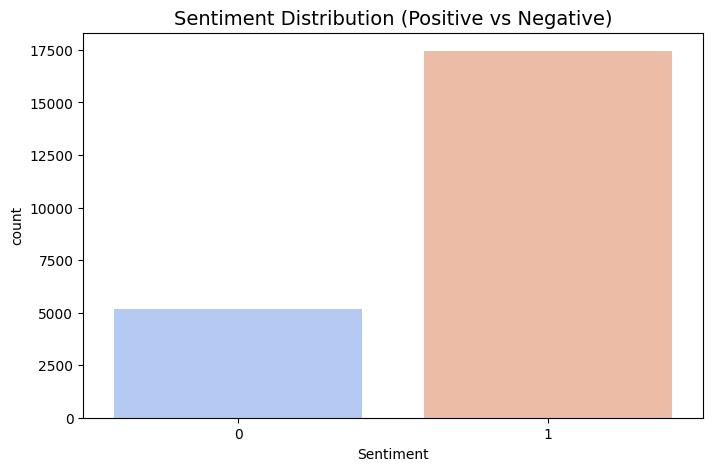

In [4]:
# Dropping rows with missing review text
data_cleaned = data.dropna(subset=["Review Text"])

# Label sentiment: Ratings 4-5 are Positive, 1-3 are Negative
data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution (Positive vs Negative)', fontsize=14)
plt.show()

**Text Vectorization Using TF-IDF**

In [6]:
# Vectorize the text data using TF-IDF
X = data_cleaned["Review Text"]
y = data_cleaned["Sentiment"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


**Training and Comparing Multiple Machine Learning Models**

In [17]:
# Create a dictionary of models to train
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store accuracy results
model_accuracy = {}

# Train and evaluate each model, store accuracy
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy[model_name] = accuracy * 100  # Store accuracy as percentage
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))


SVM Accuracy: 87.86%
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71      1045
           1       0.90      0.95      0.92      3484

    accuracy                           0.88      4529
   macro avg       0.85      0.79      0.81      4529
weighted avg       0.87      0.88      0.87      4529

Logistic Regression Accuracy: 87.35%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      1045
           1       0.89      0.96      0.92      3484

    accuracy                           0.87      4529
   macro avg       0.85      0.78      0.80      4529
weighted avg       0.87      0.87      0.87      4529

Naive Bayes Accuracy: 83.71%
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.88      0.34      0.49      1045
           1       0.83      0

<ipython-input-18-fe1069e8e367>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_scores, palette="coolwarm")


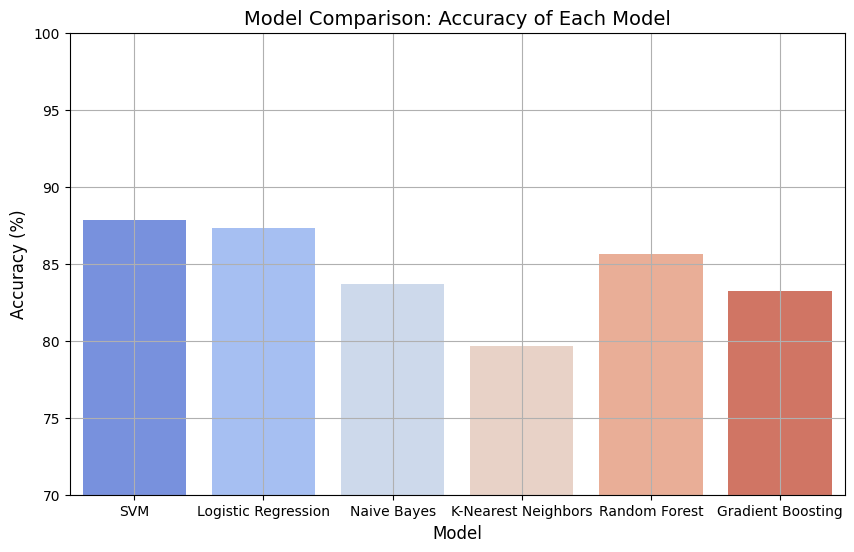

In [18]:
plt.figure(figsize=(10, 6))
model_names = list(model_accuracy.keys())
model_scores = list(model_accuracy.values())

sns.barplot(x=model_names, y=model_scores, palette="coolwarm")
plt.title("Model Comparison: Accuracy of Each Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(70, 100)  # Adjust y-axis to show results clearly
plt.grid(True)
plt.show()

**Aspect-Based Sentiment Analysis (ABSA)**

In [8]:
# Aspect-Based Sentiment Analysis (ABSA) Placeholder
# Identify keywords or entities using NER (Named Entity Recognition) or custom logic
from sklearn.feature_extraction.text import CountVectorizer

# Example: Extracting common words as 'aspects' from reviews
vectorizer_aspects = CountVectorizer(stop_words="english", max_features=10)
X_aspects = vectorizer_aspects.fit_transform(data_cleaned['Review Text'])

# Assuming these 'aspects' are identified and sentiment classified (further implementation needed)
print(f"Top Aspects Extracted: {vectorizer_aspects.get_feature_names_out()}")


Top Aspects Extracted: ['dress' 'fabric' 'fit' 'great' 'just' 'like' 'love' 'size' 'small' 'wear']


** Sentiment Trend Analysis Over Time**

In [11]:
print(data_cleaned.columns)


Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Sentiment'],
      dtype='object')


<ipython-input-13-ebc5d46221f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)
<ipython-input-13-ebc5d46221f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Date'] = pd.to_datetime(np.random.choice(pd.date_range(start="2023-01-01", end="2024-01-01", freq="D"), len(data_cleaned)))


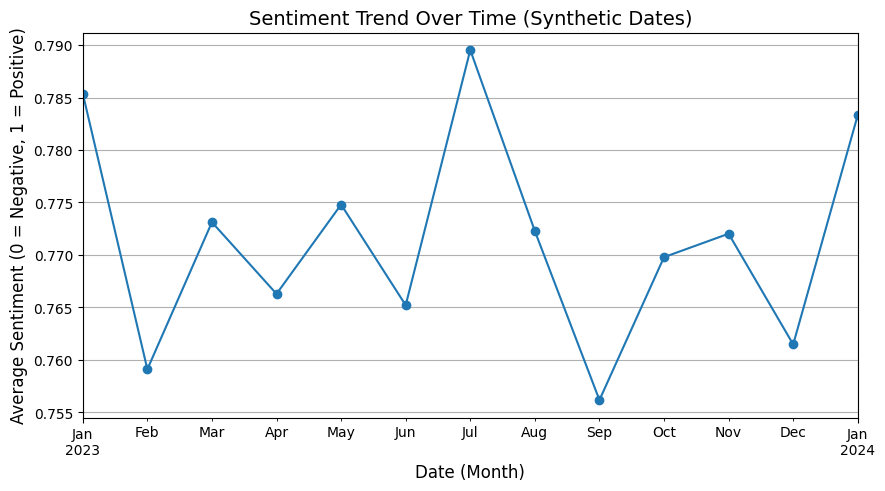

In [13]:
# Dropping rows with missing review text
data_cleaned = data.dropna(subset=["Review Text"])

# Label sentiment: Ratings 4-5 are Positive, 1-3 are Negative
data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)

# Step 1: Generate synthetic date data (e.g., within the last year)
np.random.seed(42)
data_cleaned['Date'] = pd.to_datetime(np.random.choice(pd.date_range(start="2023-01-01", end="2024-01-01", freq="D"), len(data_cleaned)))

# Step 2: Group sentiment data by month and calculate average sentiment
sentiment_trend = data_cleaned.groupby(data_cleaned['Date'].dt.to_period("M"))['Sentiment'].mean()

# Step 3: Plot sentiment trend over time
plt.figure(figsize=(10, 5))
sentiment_trend.plot(kind='line', marker='o')
plt.title('Sentiment Trend Over Time (Synthetic Dates)', fontsize=14)
plt.xlabel('Date (Month)', fontsize=12)
plt.ylabel('Average Sentiment (0 = Negative, 1 = Positive)', fontsize=12)
plt.grid(True)
plt.show()

**Customer Segmentation Using K-Means**

<ipython-input-14-d576c2d01ecd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(customer_segments, palette='coolwarm')


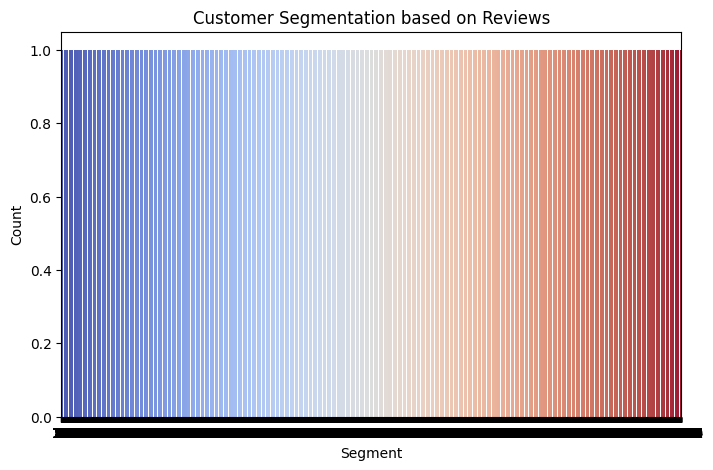

In [14]:
# Customer Segmentation using KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_segments = kmeans.fit_predict(X_train_tfidf)

# Visualize customer segments
plt.figure(figsize=(8, 5))
sns.countplot(customer_segments, palette='coolwarm')
plt.title('Customer Segmentation based on Reviews')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


**Topic Modeling Using LDA**

In [15]:
# Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_train_tfidf)

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Top words for topic #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Top words for topic #0:
['large', 'really', 'look', 'fabric', 'fit', 'just', 'small', 'size', 'like', 'dress']
Top words for topic #1:
['xs', 'ordered', 'love', 'waist', 'length', 'jeans', 'pants', 'petite', 'fit', 'size']
Top words for topic #2:
['fit', 'small', 'little', 'bra', 'beautiful', 'fits', 'wear', 'love', 'size', 'dress']
Top words for topic #3:
['fall', 'compliments', 'jeans', 'soft', 'perfect', 'wear', 'comfortable', 'dress', 'love', 'great']
Top words for topic #4:
['colors', 'blue', 'great', 'looks', 'soft', 'shirt', 'like', 'sweater', 'love', 'color']
